In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

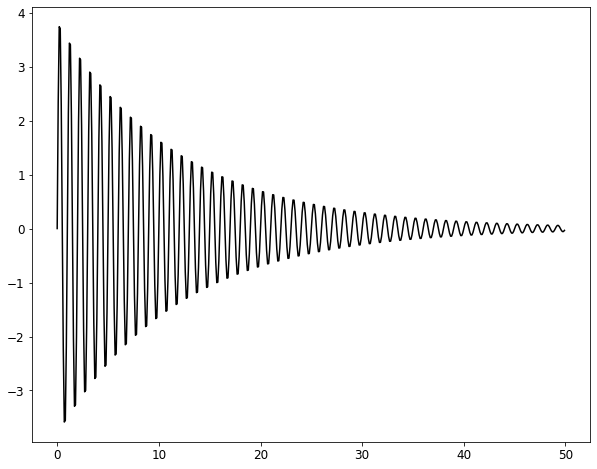

In [2]:
A = 4
lamda = 0.085
PI = math.pi
omega = 2*PI
f = omega/(2*PI)

TP = 50
t = np.arange(0,TP*(1/f),1/(f*10))
Y = A*np.exp(-lamda*t)*np.sin(omega*t)

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10,8))
plt.plot(t,Y,'k')

In [3]:
for i in range(2):
    Y = np.append(Y,Y)

In [4]:
len(t)

500

In [5]:
T = np.arange(0,4*TP*(1/f),1/(f*10))

In [6]:
len(Y)

2000

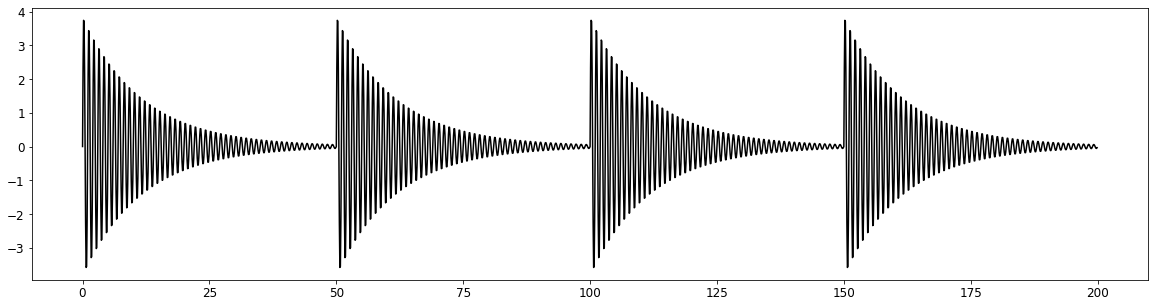

In [7]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(20,5))
plt.plot(T,Y,'k')

In [8]:
from statsmodels.tsa.tsatools import lagmat

In [9]:
lag = 5
Traj = lagmat(Y, maxlag=lag, trim="both", original='in')

In [10]:
L = len(Traj)
C = (1/L) * np.matmul(np.transpose(Traj), Traj)

In [11]:
from numpy.linalg import eig
w,v=eig(C)

In [26]:
len(v)

6

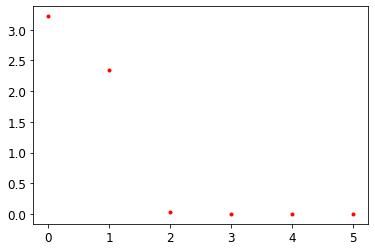

In [12]:
plt.plot(w,'r.')

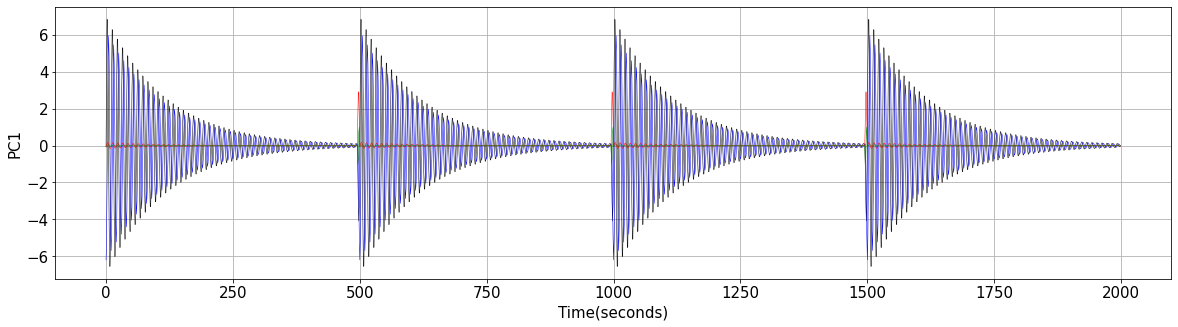

In [27]:
A1 = np.zeros(len(Y))
A2 = np.zeros(len(Y))
A3 = np.zeros(len(Y))
A4 = np.zeros(len(Y))

for i in range(len(A1)):
    sum1 = 0
    sum2 = 0
    sum3 = 0
    sum4 = 0
    
    for j in range(len(v)): 
        rho_kj = v[j][0]
        if (i+j < len(A1)) & (i+j >=0):
            y = Y[i+j]
            sum1 = sum1 + y * rho_kj
            A1[i] = sum1

    for j in range(len(v)): 
        rho_kj = v[j][1]
        if (i+j < len(A1)) & (i+j >=0):
            y = Y[i+j]
            sum2 = sum2 + y * rho_kj
            A2[i] = sum2
            
    for j in range(len(v)): 
        rho_kj = v[j][2]
        if (i+j < len(A1)) & (i+j >=0):
            y = Y[i+j]
            sum3 = sum3 + y * rho_kj
            A3[i] = sum3
            
    for j in range(len(v)): 
        rho_kj = v[j][3]
        if (i+j < len(A1)) & (i+j >=0):
            y = Y[i+j]
            sum4 = sum4 + y * rho_kj
            A4[i] = sum4
            
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=[20,5])
plt.plot(A1,'k',linewidth=0.5)
plt.plot(A2,'b',linewidth=0.5)
plt.plot(A3,'r',linewidth=0.5)
plt.plot(A4,'g',linewidth=0.5)
plt.xlabel('Time(seconds)')
plt.ylabel('PC1')
plt.grid('on')

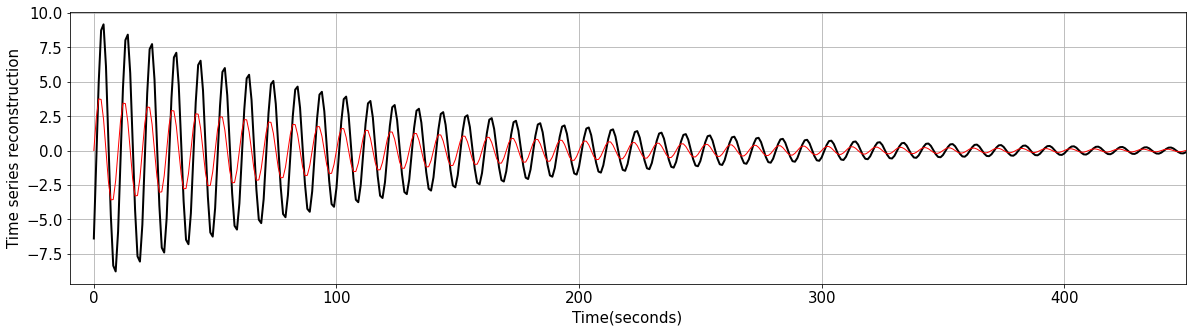

In [30]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=[20,5])
plt.plot(A1+A2+A3+A4,'k',linewidth=2.0)
plt.plot(Y,'r',linewidth=1.0)
plt.xlabel('Time(seconds)')
plt.xlim([-10,450])
plt.ylabel('Time series reconstruction')
plt.grid('on')

In [31]:
# Reconstruction
Rec1 = np.zeros(len(Y))
M = len(v[0])
N1 = len(Traj)
N = len(Y)
K = 2

a = np.zeros((K,len(Y)))
a[0,:] = A1
a[1,:] = A2

for i in range(len(Rec1)):
    if (i <= M-2):
        sum1 = 0   
        for k in range(K): 
            for j in range(0,i):
                ak = a[k][i-j+1]
                rho_k = v[j][k]
                sum1 = sum1 + ak * rho_k
        Mt = (1/(i+1))
        Rec1[i] = sum1

    elif (i >=M-1) & (i<= N1-1):
        sum1 = 0
        for k in range(K): 
            for j in range(0,M):
                ak = a[k][i-j+1]
                rho_k = v[j][k]
                sum1 = sum1 + ak * rho_k
        Mt = (1/M)
        Rec1[i] = sum1
        
    elif (i >=N1) & (i <= N):
        sum1 = 0
        for k in range(K): 
            for j in range(i-N+M,M):
                ak = a[k][i-j+1]
                rho_k = v[j][k]
                sum1 = sum1 + ak * rho_k
        Mt = (1/(N-i+2))
        Rec1[i] = sum1

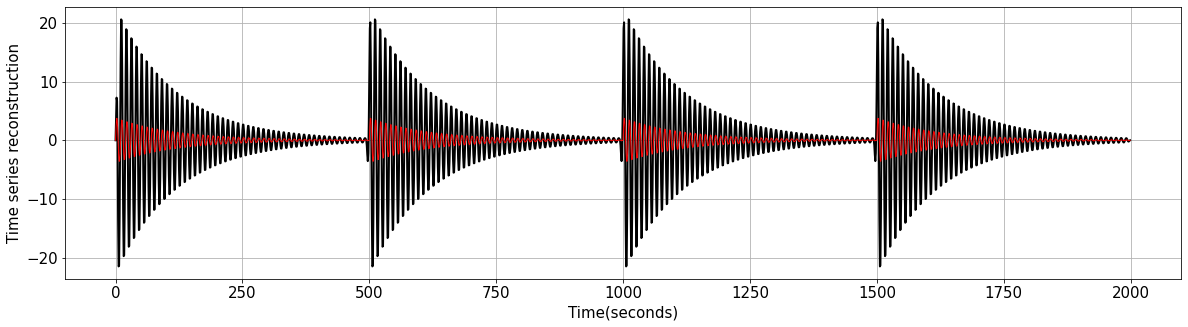

In [32]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=[20,5])
plt.plot(Rec1,'k',linewidth=2.0)
plt.plot(Y,'r',linewidth=1.0)
plt.xlabel('Time(seconds)')
plt.ylabel('Time series reconstruction')
plt.grid('on')